In [1]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 898.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


# **Toss A Coin**

In [ ]:
#Set the seed for reproducibility
np.random.seed(5566)

In [ ]:
#Toss a fair coin 10 times
S=10
x=np.random.choice([0,1],S,replace=True,p=[0.5,0.5])
np.sum(x)
np.sum(x)/len(x)

0.7

In [ ]:
#Toss a fair coin 100 times
S=100
x=np.random.choice([0,1],S,replace=True,p=[0.5,0.5])
np.sum(x)
np.sum(x)/len(x)

0.44

In [ ]:
#Toss a fair coin 10000 times
S=10000
x=np.random.choice([0,1],S,replace=True,p=[0.5,0.5])
np.sum(x)
np.sum(x)/len(x)

0.5011

In [ ]:
np.random.choice([-1,1],50,replace=True,p=[0.5,0.5])

array([ 1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1])

In [ ]:
#Let Han & Ko play the game
S=10000
earning=np.empty(S)
k=0
#counter
for s in range(S):
  x=np.random.choice([-1,1],50,replace=True,p=[0.5,0.5])
  earning[s]=np.sum(x)
  if earning[s] == 0:
    k=k+1

#Check if there is any nan (not a number)
print(np.isnan(earning).any())

#Summary statistics
print(stats.describe(earning))

False
DescribeResult(nobs=10000, minmax=(-24.0, 26.0), mean=0.1156, variance=49.88842548254824, skewness=-0.047903120574425806, kurtosis=-0.07981764390953083)


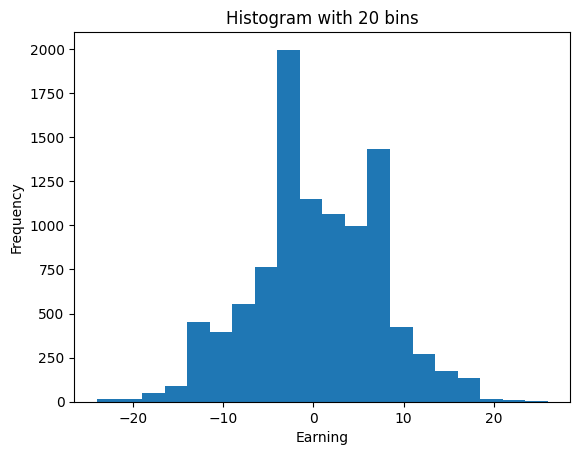

In [ ]:
#Plot the distribution of earning
plt.hist(earning, bins=20)
plt.xlabel("Earning")
plt.ylabel("Frequency")
plt.title("Histogram with 20 bins")
plt.show()

In [ ]:
#Pring the # of runs in which KeP breaks even
print(k)
print(k/S)

#Theoretical probability
stats.binom.pmf(25,50,0.5)

1150
0.115


0.11227517265921712

In [ ]:
x=np.random.choice([-1,1],50,replace=True,p=[0.5,0.5])
cumx=np.cumsum(x)

leadid=np.where(cumx>0)
maxx=np.max(cumx)

print(x)
print(cumx)
print(leadid)
print(len(cumx[leadid]))
print(maxx)

[-1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1
 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1
  1  1]
[-1  0 -1  0  1  2  3  4  3  2  1  2  3  2  1  2  1  0  1  2  1  2  1  0
 -1  0 -1 -2 -1  0  1  0 -1  0 -1 -2 -3 -4 -5 -4 -3 -2 -3 -2 -1  0  1  0
  1  2]
(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21,
       22, 30, 46, 48, 49]),)
22
4


In [ ]:
#Let Han & Ko play the game
S=10000
earning=np.empty(S)
positive=np.empty(S)
maxearning=np.empty(S)
k=0
for s in range(S):
  x=np.random.choice([-1,1],50,replace=True,p=[0.5,0.5])
  earning[s]=np.sum(x)
  #
  cumx=np.cumsum(x)
  leadid=np.where(cumx>0)
  positive[s]=len(cumx[leadid])
  #
  maxx=np.max(cumx)
  maxearning[s]=maxx

In [ ]:
#Estimate the number of rounds KoP with >$0
print(np.mean(positive))
print(np.median(positive))

In [ ]:
#Estimate KoP's highest fortune in the game
print(np.mean(maxearning))
print(np.median(maxearning))

In [ ]:
#Estimate KoP's chance with maxearning > 10 in the game
id=np.where(maxearning>10)
len(maxearning[id])
print(len(maxearning[id]))
print(len(maxearning[id])/S)